In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [26]:
with open("/content/Entity Recognition in Resumes.json", 'r') as f:
        lines = f.readlines()

In [27]:
len(lines)

220

In [28]:
lines[0]

'{"content": "Abhishek Jha\\nApplication Development Associate - Accenture\\n\\nBengaluru, Karnataka - Email me on Indeed: indeed.com/r/Abhishek-Jha/10e7a8cb732bc43a\\n\\n• To work for an organization which provides me the opportunity to improve my skills\\nand knowledge for my individual and company\'s growth in best possible ways.\\n\\nWilling to relocate to: Bangalore, Karnataka\\n\\nWORK EXPERIENCE\\n\\nApplication Development Associate\\n\\nAccenture -\\n\\nNovember 2017 to Present\\n\\nRole: Currently working on Chat-bot. Developing Backend Oracle PeopleSoft Queries\\nfor the Bot which will be triggered based on given input. Also, Training the bot for different possible\\nutterances (Both positive and negative), which will be given as\\ninput by the user.\\n\\nEDUCATION\\n\\nB.E in Information science and engineering\\n\\nB.v.b college of engineering and technology -  Hubli, Karnataka\\n\\nAugust 2013 to June 2017\\n\\n12th in Mathematics\\n\\nWoodbine modern school\\n\\nApril 20

In [29]:
import json
d1 = json.loads(lines[0])
d1

{'content': "Abhishek Jha\nApplication Development Associate - Accenture\n\nBengaluru, Karnataka - Email me on Indeed: indeed.com/r/Abhishek-Jha/10e7a8cb732bc43a\n\n• To work for an organization which provides me the opportunity to improve my skills\nand knowledge for my individual and company's growth in best possible ways.\n\nWilling to relocate to: Bangalore, Karnataka\n\nWORK EXPERIENCE\n\nApplication Development Associate\n\nAccenture -\n\nNovember 2017 to Present\n\nRole: Currently working on Chat-bot. Developing Backend Oracle PeopleSoft Queries\nfor the Bot which will be triggered based on given input. Also, Training the bot for different possible\nutterances (Both positive and negative), which will be given as\ninput by the user.\n\nEDUCATION\n\nB.E in Information science and engineering\n\nB.v.b college of engineering and technology -  Hubli, Karnataka\n\nAugust 2013 to June 2017\n\n12th in Mathematics\n\nWoodbine modern school\n\nApril 2011 to March 2013\n\n10th\n\nKendriya 

In [30]:
d1["content"]

"Abhishek Jha\nApplication Development Associate - Accenture\n\nBengaluru, Karnataka - Email me on Indeed: indeed.com/r/Abhishek-Jha/10e7a8cb732bc43a\n\n• To work for an organization which provides me the opportunity to improve my skills\nand knowledge for my individual and company's growth in best possible ways.\n\nWilling to relocate to: Bangalore, Karnataka\n\nWORK EXPERIENCE\n\nApplication Development Associate\n\nAccenture -\n\nNovember 2017 to Present\n\nRole: Currently working on Chat-bot. Developing Backend Oracle PeopleSoft Queries\nfor the Bot which will be triggered based on given input. Also, Training the bot for different possible\nutterances (Both positive and negative), which will be given as\ninput by the user.\n\nEDUCATION\n\nB.E in Information science and engineering\n\nB.v.b college of engineering and technology -  Hubli, Karnataka\n\nAugust 2013 to June 2017\n\n12th in Mathematics\n\nWoodbine modern school\n\nApril 2011 to March 2013\n\n10th\n\nKendriya Vidyalaya\n\

In [31]:
d1["content"].replace("\n", " ")

"Abhishek Jha Application Development Associate - Accenture  Bengaluru, Karnataka - Email me on Indeed: indeed.com/r/Abhishek-Jha/10e7a8cb732bc43a  • To work for an organization which provides me the opportunity to improve my skills and knowledge for my individual and company's growth in best possible ways.  Willing to relocate to: Bangalore, Karnataka  WORK EXPERIENCE  Application Development Associate  Accenture -  November 2017 to Present  Role: Currently working on Chat-bot. Developing Backend Oracle PeopleSoft Queries for the Bot which will be triggered based on given input. Also, Training the bot for different possible utterances (Both positive and negative), which will be given as input by the user.  EDUCATION  B.E in Information science and engineering  B.v.b college of engineering and technology -  Hubli, Karnataka  August 2013 to June 2017  12th in Mathematics  Woodbine modern school  April 2011 to March 2013  10th  Kendriya Vidyalaya  April 2001 to March 2011  SKILLS  C (Les

In [32]:
d1['annotation']

[{'label': ['Skills'],
  'points': [{'start': 1295,
    'end': 1621,
    'text': '\n• Programming language: C, C++, Java\n• Oracle PeopleSoft\n• Internet Of Things\n• Machine Learning\n• Database Management System\n• Computer Networks\n• Operating System worked on: Linux, Windows, Mac\n\nNon - Technical Skills\n\n• Honest and Hard-Working\n• Tolerant and Flexible to Different Situations\n• Polite and Calm\n• Team-Player'}]},
 {'label': ['Skills'],
  'points': [{'start': 993,
    'end': 1153,
    'text': 'C (Less than 1 year), Database (Less than 1 year), Database Management (Less than 1 year),\nDatabase Management System (Less than 1 year), Java (Less than 1 year)'}]},
 {'label': ['College Name'],
  'points': [{'start': 939, 'end': 956, 'text': 'Kendriya Vidyalaya'}]},
 {'label': ['College Name'],
  'points': [{'start': 883, 'end': 904, 'text': 'Woodbine modern school'}]},
 {'label': ['Graduation Year'],
  'points': [{'start': 856, 'end': 860, 'text': '2017\n'}]},
 {'label': ['College 

In [33]:
d1_annotations = d1['annotation']
for annotation in d1_annotations:
    #only a single point in text annotation.
    point = annotation['points'][0]
    labels = annotation['label']

In [34]:
point

{'start': 0, 'end': 11, 'text': 'Abhishek Jha'}

In [35]:
labels

['Name']

In [36]:
point_start = point['start']
point_end = point['end']
point_text = point['text']
point_text

'Abhishek Jha'

In [37]:
lstrip_diff = len(point_text) - len(point_text.lstrip())
rstrip_diff = len(point_text) - len(point_text.rstrip())

In [38]:
len(point_text.lstrip())

12

In [39]:
len(point_text)

12

In [40]:
len(point_text.rstrip())

12

In [41]:
e = []
e.append((point_start, point_end + 1 , labels[0]))
e

[(0, 12, 'Name')]

In [42]:
tr_data = []
t = d1["content"].replace("\n", " ")
tr_data.append((t, {"entities" : e}))
tr_data

[("Abhishek Jha Application Development Associate - Accenture  Bengaluru, Karnataka - Email me on Indeed: indeed.com/r/Abhishek-Jha/10e7a8cb732bc43a  • To work for an organization which provides me the opportunity to improve my skills and knowledge for my individual and company's growth in best possible ways.  Willing to relocate to: Bangalore, Karnataka  WORK EXPERIENCE  Application Development Associate  Accenture -  November 2017 to Present  Role: Currently working on Chat-bot. Developing Backend Oracle PeopleSoft Queries for the Bot which will be triggered based on given input. Also, Training the bot for different possible utterances (Both positive and negative), which will be given as input by the user.  EDUCATION  B.E in Information science and engineering  B.v.b college of engineering and technology -  Hubli, Karnataka  August 2013 to June 2017  12th in Mathematics  Woodbine modern school  April 2011 to March 2013  10th  Kendriya Vidyalaya  April 2001 to March 2011  SKILLS  C (L

In [43]:
# Processing Indexes
# import logging
import json
import re

# JSON formatting functions
def convert_dataturks_to_spacy(dataturks_JSON_FilePath):
    training_data = []
    lines=[]
    with open(dataturks_JSON_FilePath, 'r') as f:
        lines = f.readlines()

    for line in lines:
        data = json.loads(line)
        text = data['content'].replace("\n", " ")
        entities = []
        data_annotations = data['annotation']
        if data_annotations is not None:
            for annotation in data_annotations:
                #only a single point in text annotation.
                point = annotation['points'][0]
                labels = annotation['label']
                # handle both list of labels or a single label.
                if not isinstance(labels, list):
                    labels = [labels]

                for label in labels:
                    point_start = point['start']
                    point_end = point['end']
                    point_text = point['text']

                    lstrip_diff = len(point_text) - len(point_text.lstrip())
                    rstrip_diff = len(point_text) - len(point_text.rstrip())
                    if lstrip_diff != 0:
                        point_start = point_start + lstrip_diff
                    if rstrip_diff != 0:
                        point_end = point_end - rstrip_diff
                    entities.append((point_start, point_end + 1 , label))
        training_data.append((text, {"entities" : entities}))
    return training_data
def trim_entity_spans(data: list) -> list:
    """Removes leading and trailing white spaces from entity spans.

    Args:
        data (list): The data to be cleaned in spaCy JSON format.

    Returns:
        list: The cleaned data.
    """
    invalid_span_tokens = re.compile(r'\s')

    cleaned_data = []
    for text, annotations in data:
        entities = annotations['entities']
        valid_entities = []
        for start, end, label in entities:
            valid_start = start
            valid_end = end
            while valid_start < len(text) and invalid_span_tokens.match(
                    text[valid_start]):
                valid_start += 1
            while valid_end > 1 and invalid_span_tokens.match(
                    text[valid_end - 1]):
                valid_end -= 1
            valid_entities.append([valid_start, valid_end, label])
        cleaned_data.append([text, {'entities': valid_entities}])
    return cleaned_data

In [44]:
data = trim_entity_spans(convert_dataturks_to_spacy("/content/Entity Recognition in Resumes.json"))
data[0]

["Abhishek Jha Application Development Associate - Accenture  Bengaluru, Karnataka - Email me on Indeed: indeed.com/r/Abhishek-Jha/10e7a8cb732bc43a  • To work for an organization which provides me the opportunity to improve my skills and knowledge for my individual and company's growth in best possible ways.  Willing to relocate to: Bangalore, Karnataka  WORK EXPERIENCE  Application Development Associate  Accenture -  November 2017 to Present  Role: Currently working on Chat-bot. Developing Backend Oracle PeopleSoft Queries for the Bot which will be triggered based on given input. Also, Training the bot for different possible utterances (Both positive and negative), which will be given as input by the user.  EDUCATION  B.E in Information science and engineering  B.v.b college of engineering and technology -  Hubli, Karnataka  August 2013 to June 2017  12th in Mathematics  Woodbine modern school  April 2011 to March 2013  10th  Kendriya Vidyalaya  April 2001 to March 2011  SKILLS  C (Le

In [45]:
# Entity Mapping
!pip install spacy==2.1.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.8/29.8 MB 8.9 MB/s eta 0:00:00
error: invalid-pyproject-build-system-requires

× Can not process spacy==2.1.4 from https://files.pythonhosted.org/packages/56/30/977e6dec3a42f3dc035631f0db5fe69a573f29fdbc7977226eab18f2f5f6/spacy-2.1.4.tar.gz
╰─> This package has an invalid `build-system.requires` key in pyproject.toml.
    It contains an invalid requirement: 'wheel>0.32.0.<0.33.0'

note: This is an issue with the package mentioned above, not pip.
hint: See PEP 518 for the detailed specification.


In [46]:
# Entity Aggregation
import math
math.floor(0.2 * len(data))

44

In [48]:
test_size = 0.2
test_idx = len(data) - math.floor(test_size * len(data))

In [49]:
# Modeling
import random
import math

def train_test_split(data, test_size, random_state):

    random.Random(random_state).shuffle(data)
    test_idx = len(data) - math.floor(test_size * len(data))
    train_set = data[0: test_idx]
    test_set = data[test_idx: ]

    return train_set, test_set


In [50]:
train_data, test_data = train_test_split(data, test_size = 0.1, random_state = 42)

In [52]:
!pip install spacy


In [54]:
import spacy
spacy.__version__

'3.8.7'

In [55]:
!-m pip install dash==1.20.0

/bin/bash: - : invalid option
Usage:	/bin/bash [GNU long option] [option] ...
	/bin/bash [GNU long option] [option] script-file ...
GNU long options:
	--debug
	--debugger
	--dump-po-strings
	--dump-strings
	--help
	--init-file
	--login
	--noediting
	--noprofile
	--norc
	--posix
	--pretty-print
	--rcfile
	--restricted
	--verbose
	--version
Shell options:
	-ilrsD or -c command or -O shopt_option		(invocation only)
	-abefhkmnptuvxBCHP or -o option


In [56]:
!pip install spacy==3.0.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 55.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [57]:
!pip install h5py

In [58]:
!pip install typing-extensions

In [59]:
!pip install wheel

In [60]:
!pip install -U spacy

In [61]:
spacy.__version__

'3.8.7'

In [62]:
import spacy
from spacy.tokens import DocBin
from tqdm import tqdm

nlp = spacy.blank("en") # load a new spacy model
doc_bin = DocBin()

In [63]:
for training_example  in tqdm(train_data):
    print(training_example[1])
    print("\n")
    print(training_example[1]['entities'][0])
    break

  0%|          | 0/198 [00:00<?, ?it/s]

{'entities': [[2207, 2359, 'Skills'], [2095, 2137, 'College Name'], [1945, 1993, 'Degree'], [464, 479, 'Companies worked at'], [447, 462, 'Designation'], [277, 286, 'Location'], [226, 241, 'Companies worked at'], [209, 224, 'Designation'], [125, 169, 'Email Address'], [82, 91, 'Location'], [32, 47, 'Companies worked at'], [15, 30, 'Designation'], [0, 14, 'Name']]}


[2207, 2359, 'Skills']


In [65]:
for training_example  in tqdm(train_data):
    text = training_example[0]
    l = training_example[1]
    doc = nlp.make_doc(text)
#     print(training_example[1])
#     print("\n")
#     print(training_example[1]['entities'][0])

    for start, end, label in l['entities']:
        print(start, end, label)
        print(label)
        print("\n")
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        print("Span Text:",span.text)
        print("Span Label:",span.label_)
        if span is None:
            print("None Span")
        else:
            print("Not None")
        break
    break

  0%|          | 0/198 [00:00<?, ?it/s]

2207 2359 Skills
Skills


Span Text: ● Corporate Communications ● Creative Team Leadership ● Adept problem solver  • Development of Training Materials ● Strong Analytical and logical skills
Span Label: Skills
Not None


In [66]:
from spacy.util import filter_spans

for training_example  in tqdm(train_data):
    text = training_example[0]
    labels = training_example[1]
    doc = nlp.make_doc(text)
    ents = []
    for start, end, label in labels['entities']:
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    filtered_ents = filter_spans(ents)
    doc.ents = filtered_ents
    doc_bin.add(doc)

doc_bin.to_disk("train.spacy")

  2%|▏         | 3/198 [00:00<00:08, 23.04it/s]

Skipping entity
Skipping entity
Skipping entity


  9%|▉         | 18/198 [00:00<00:03, 53.06it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


 13%|█▎        | 25/198 [00:00<00:03, 50.59it/s]

Skipping entity
Skipping entity
Skipping entity


 22%|██▏       | 44/198 [00:00<00:03, 49.17it/s]

Skipping entity
Skipping entity
Skipping entity


 27%|██▋       | 53/198 [00:01<00:02, 59.49it/s]

Skipping entity
Skipping entity


 30%|███       | 60/198 [00:01<00:03, 34.67it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


 33%|███▎      | 65/198 [00:01<00:04, 32.98it/s]

Skipping entity


 38%|███▊      | 75/198 [00:02<00:04, 29.19it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


 41%|████      | 81/198 [00:02<00:03, 33.62it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity


 45%|████▌     | 90/198 [00:02<00:03, 28.94it/s]

Skipping entity
Skipping entity
Skipping entity


 49%|████▉     | 98/198 [00:02<00:03, 30.28it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity


 56%|█████▌    | 110/198 [00:03<00:02, 38.78it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


 64%|██████▍   | 127/198 [00:03<00:01, 53.82it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


 73%|███████▎  | 144/198 [00:03<00:00, 64.20it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


 80%|███████▉  | 158/198 [00:03<00:00, 63.76it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


 92%|█████████▏| 183/198 [00:04<00:00, 76.56it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


 96%|█████████▋| 191/198 [00:04<00:00, 64.69it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


100%|██████████| 198/198 [00:04<00:00, 45.46it/s]


In [67]:
# training spacy
import spacy

def train_spacy():

    nlp = spacy.blank('en')  # create blank Language class
    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe('ner')
        nlp.add_pipe(ner, last=True)

    # add labels
    for _, annotations in train_data:
         for ent in annotations.get("entities"):
            ner.add_label(ent[2])

    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    with nlp.disable_pipes(*other_pipes):  # only train NER
        optimizer = nlp.begin_training()
        for itn in range(10):
            print("Statring iteration " + str(itn))
            random.shuffle(train_data)
            losses = {}
            for text, annotations in train_data:
                nlp.update(
                    [text],  # batch of texts
                    [annotations],  # batch of annotations
                    drop=0.2,  # dropout - make it harder to memorise data
                    sgd=optimizer,  # callable to update weights
                    losses=losses)
            print(losses)
    return nlp

In [69]:
# training spacy
import spacy

def train_spacy():

    nlp = spacy.blank('en')  # create blank Language class
    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe('ner')
        nlp.add_pipe('ner', last=True)

    # add labels
    for _, annotations in train_data:
         for ent in annotations.get("entities"):
            ner.add_label(ent[2])

    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    with nlp.disable_pipes(*other_pipes):  # only train NER
        optimizer = nlp.begin_training()
        for itn in range(10):
            print("Statring iteration " + str(itn))
            random.shuffle(train_data)
            losses = {}
            for text, annotations in train_data:
                nlp.update(
                    [text],  # batch of texts
                    [annotations],  # batch of annotations
                    drop=0.2,  # dropout - make it harder to memorise data
                    sgd=optimizer,  # callable to update weights
                    losses=losses)
            print(losses)
    return nlp

In [75]:
def ner_report(y_true, y_pred):
    from sklearn.preprocessing import LabelBinarizer
    from sklearn.metrics import classification_report, accuracy_score
    from itertools import chain

    # Flatten full tag sequences
    y_true_flat = list(chain.from_iterable(y_true))
    y_pred_flat = list(chain.from_iterable(y_pred))

    # Use all tags (including 'O') for binarization
    all_tags = sorted(list(set(y_true_flat + y_pred_flat)))
    tagset_no_O = [tag for tag in all_tags if tag != 'O']

    if not tagset_no_O:
        return "⚠️ No entities to report on (all tokens are 'O').", accuracy_score(y_true_flat, y_pred_flat)

    # Fit binarizer on all classes
    lb = LabelBinarizer()
    lb.fit(all_tags)

    # Transform entire sequences (even 'O')
    y_true_bin = lb.transform(y_true_flat)
    y_pred_bin = lb.transform(y_pred_flat)

    # Build report for tags excluding 'O'
    class_indices = {cls: idx for idx, cls in enumerate(lb.classes_)}
    report_labels = [class_indices[tag] for tag in tagset_no_O]
    report_names = tagset_no_O

    report = classification_report(
        y_true_bin,
        y_pred_bin,
        labels=report_labels,
        target_names=report_names,
        zero_division=0
    )

    accuracy = accuracy_score(y_true_flat, y_pred_flat)
    return report, accuracy


In [77]:
report, accuracy = ner_report(y_test, y_pred)
print(report)
print(f"\n✅ Token-Level Accuracy: {accuracy:.2f}")

              precision    recall  f1-score   support

        BORG       0.00      0.00      0.00         0
     BPERSON       1.00      1.00      1.00         1
     IPERSON       1.00      1.00      1.00         1

   micro avg       0.50      1.00      0.67         2
   macro avg       0.67      0.67      0.67         2
weighted avg       1.00      1.00      1.00         2
 samples avg       0.15      0.15      0.15         2


✅ Token-Level Accuracy: 0.85


In [78]:
# Train the spaCy model (if not already trained)
if 'nlp' not in locals() or nlp is None:
    print("Training spaCy model...")
    nlp = train_spacy()
else:
    print("spaCy model already trained.")

# Make a prediction on a sample text
sample_text = "John Doe is a software engineer at Google in California."
doc = nlp(sample_text)

# Display the entities
print(f"Sample Text: {sample_text}")
print("Entities:")
for ent in doc.ents:
    print(f"- {ent.text} ({ent.label_})")

spaCy model already trained.
Sample Text: John Doe is a software engineer at Google in California.
Entities:
- John Doe (PERSON)
- Google (ORG)
- California (GPE)


In [79]:
from spacy import displacy

# Visualize the entities in the sample text
print("\nVisualization of Entities:")
displacy.render(doc, style="ent", jupyter=True)


Visualization of Entities:


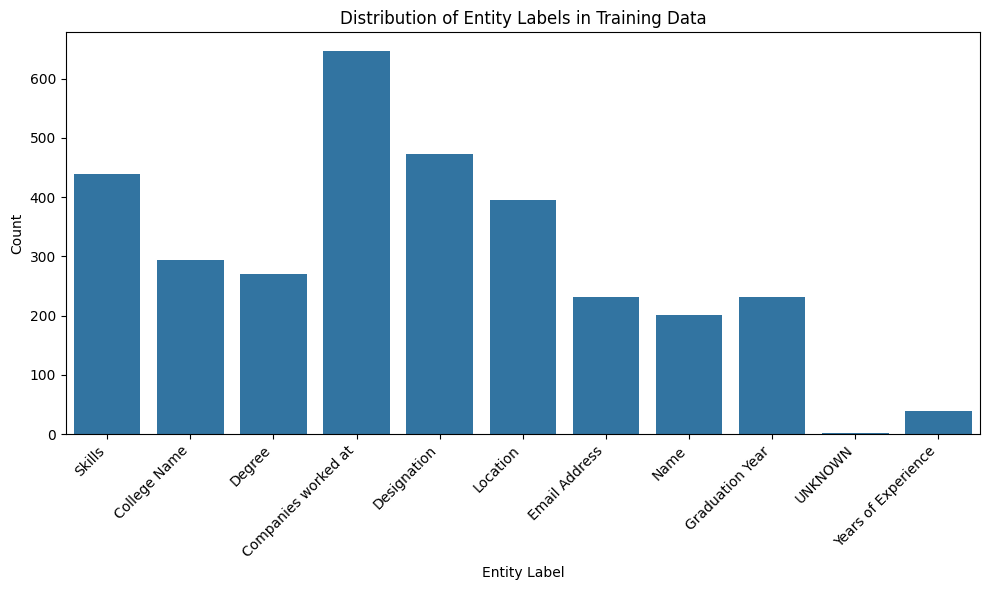

In [80]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Extract all entity labels from the training data
all_labels = []
for _, annotations in train_data:
    for start, end, label in annotations.get("entities"):
        all_labels.append(label)

# Count the occurrences of each label
label_counts = Counter(all_labels)

# Create a bar chart of the label distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()))
plt.xticks(rotation=45, ha='right')
plt.xlabel("Entity Label")
plt.ylabel("Count")
plt.title("Distribution of Entity Labels in Training Data")
plt.tight_layout()
plt.show()

In [81]:
# Save the trained model
output_dir = "/content/ner_model"
nlp.to_disk(output_dir)
print(f"Trained model saved to {output_dir}")

Trained model saved to /content/ner_model
